# CSE6730 Project 1
# Traffic Flow Simulation using Atlanta Real Traffic Data

### Author: Yuanlai Zhou, Junghyun Kim, Wendi Ren

## Environment setup

Please make sure that you need to download all libraries as below. Otherwise, you will run into an error during the simulation.

In [1]:
# Import all libraries needed for this Jupyter notebook
import math
import time
import numpy as np
import pandas as pd
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
from mpl_toolkits.basemap import Basemap

# 1. Project overview

## 1.1 Problem definition

According to the new study by transportation analytics firm INRIX, Atlanta was the United States 4th most traffic-congested city in 2017. As shown in the Figure as below, it was reported that Atlanta drivers spent an average of 70 hours in congestion in 2017. To add insult injury, it is seemingly inevitable to confront the traffic saturation issues occurring in various locations such as I-85 highway. In response to these concerns, many researchers have studied on traffic flow problem which is defined as the study of interactions between travellers and infrastructure with the aim of understanding and developing an optimal transport network with efficient movement of traffic. As such, the ultimate aim of studying traffic flow problems is to understand traffic phenomena such that it can help people eventually make better decisions which may alleviate congestion, maximize flow of traffic, eliminate accidents, minimize automobile exhaust pollution, and other desirable ends.

<img src="images/Congested_cities_statistics.png" style="width: 500px;"/>

## 1.2 Proposed methodology

In this project, we will establish a basic model based on both linear Partial Differential Equation(PDE) and non-linear PDE to describe traffic flow. Once we complete to create the mathematical models for traffic flow, we will solve the linear PDE analytically and solve the non-linear PDE using numerical methods such as Runge-Kutta 4th order with discretization method. In order to compare the accuracy of models, we will perform a case study with a solid understanding of the relationship among variables such as flow speed, density of traffic flow passing through every point on a location at every moment. In terms of the traffic data such as flow speed, we will collect them from The Georgia Department of Transportation(DOT). 

After solving basic model with two methods, we expand our basic model by adding real world effects and relax some assumptions of the basic model. We will study two cases: 1) the influence of traffic lights and 2) the influence of entrance or exits of highway, where the density is no longer constant.

<img src="images/Project_overview.png" style="width: 600px;"/>

# 2. Data collection and pre-processing
We collect real traffic data from the Georgia Department of Transportation (GDOT) website: https://gdottrafficdata.drakewell.com/publicmultinodemap.asp 

The green points are the observation stations.

<img src="images/GODT.png" style="width: 300px;"/>

Then, we can choose any station to get velocity and flow statistics.

For example, if we choose 089-3058 US-78/SR410 bn SR 10 & Hugh Howell Rd, ATL, then we can get all the information shown below.

<img src="images/example.png" style="width: 600px;"/>

We need the data of speed and cars volume. Here, we could select any time interval to see the data. For example, by selecting Jan 1 to Jan 8, 2019, the daily volume data are available.

<img src="images/flow.png" style="width: 600px;"/>

The speed data are also available.
<img src="images/speed.png" style="width: 600px;"/>

After downloading velocity and flow data from several stations as ".csv" file, we do simulation and compare our results with real data to verify the model accuracy. For your convenience, we already downloaded and tabulated the dataset into csv files. Please download the csv files and put them to the folder where this tutorial is working.

# 3. Linear model

## 3.1 Background and assumptions

Firstly, we model the most common and basic traffic condition, that is different cars move at different
speed along the one-way movement on the infinite road.  In addition, overtaking is not allowed and cars will
not enter or exit through other channels.
<br>
Further, we set $x=0$ as the origin on the highway. The positive direction of axis $x$ represents the direction of traffic flow, so any point on the highway is shown by the coordinate $x$.
<br>
To describe status of traffic in any location and any time, we introduce three basic functions: traffic flow: $q(x,t)$, number of cars passing through point $x$ at time $t$ during unit time; traffic density: $\rho(x,t)$, number of cars of unit length at point $x$ and time $t$; velocity field: $u(x,t)$, velocities of cars at point $x$ and time $t$. The relationship between these three functions is $q(x,t)=u(x,t)*\rho(x,t)$.
<br>
In addition, as a rule of thumb, the speed of traffic decreases as the density of traffic increases. Thus, we could make an assumption that  the velocity of cars depends only on traffic density, so $u=u(\rho)$.

## 3.2 Formula derivation

Based on above comments, we could derive the Linear Partial Differential Equation. To start with, we assume that $q(x,t), u(x,t), p(x,t)$ are continuous and differentiable functions of $x,t$, and they satisfy the properties required for analytic operations.
<br>
Let's say for time $t$ and $x\in[a,b]$, the number of cars in this interval is $\int_{a}^{b}\rho(x,t)dx$. Further, we know that the difference in the number of cars passing through points $a$ and $b$ per unit time is equal to the rate of change of the number of cars,then *we* have equation(1):
\begin{align}
    q(a,t)-q(b,t)=\dfrac{d}{dt}\int_{a}^{b}\rho(x,t)dx
\end{align}
<br>
The left and right side of above equation could be written as follows:
\begin{align}
    q(a,t)-q(b,t)=-\int_{a}^{b}\dfrac{\partial}{\partial x}q(x,t)dx\\ \dfrac{d}{dt}\int_{a}^{b}\rho(x,t)dx=\int_{a}^{b}\dfrac{\partial}{\partial t}\rho(x,t)dx
\end{align}
<br>
We combine these new equations together, then we have: $\int_{a}^{b}(\dfrac{\partial \rho}{\partial t}+\dfrac{\partial q}{\partial x})dx=0 $. What is more, since the interval $[a,b]$ is arbitrary, we have: $\dfrac{\partial \rho}{\partial t}+\dfrac{\partial q}{\partial x}=0$, which is the continuous traffic flow equation.
<br>
To solve this equation, we could assume that the density is nearly constant, then we get $\rho(x,t)=\rho_{0}+\delta \rho_{1}(x,t)$, in which $\delta \rho_{1}(x,t)$ is called the perturbed traffic density.
<br>
Take density equation into the partial differential equation, we get $\dfrac{\partial \rho_{1}}{\partial t}+c \dfrac{\partial \rho_{1}}{\partial x}=0$, which is the Linear Partial Differential Equation, where $c$ is a constant, $c=\dfrac{dq}{d\rho}(\rho_{0})$, $c$ is the velocity of traffic relative to the origin point.
<br>
Based on the characteristic equations and first integration method, we could get the solution of the Linear Partial Differential Equation as follows, **equation(2)**:
\begin{align}
    \rho_{1}(x,t)=f(x-c*t)\\
    x(t)=c*t+x_{0}
\end{align}
<br>
According to the above, we find that when $x-c*t= constant$, the density stays the same.
<br>
In addition, as we mentioned above, relationship between velocity of cars and density could be described as $u=u(\rho)$. When the road is empty, cars could run at maximum speed, that is, $\rho=0, u=u_{max}$. Instead, when there is a traffic jam, cars couldn't go forward, that is, $\rho=\rho_{max}, u=0$. Thus, we could assume that, **equation(3)**:
\begin{align}
    u=u_{max}(1-\dfrac{\rho}{\rho_{max}})\\
    q=\rho u_{max}(1-\dfrac{\rho}{\rho_{max}})
\end{align}
<br>
The above equation shows that the traffic flow increases first and then decreases with the increase of density.

### 3.2.1 Validation of equation(2)

To show that when $x-c*t= constant$, the density stays the same. We collect data from two observation stations: 1) DI-85 W of Jimmy Carter Blvd @Graves Rd NW, ATL; 2) I-85 btwn Jimmy Carter and Indian Trail, Norcross. Data of these two adjacent sites are in the North direction of I-85, so, it can be viewed as the interval $[a, b]$ as we mentioned above.
<br>
We choose one day data from Jan 6, 2019(Sunday). For each station, we have daily flow and daily speed with the time period of one hour, which means we create two tables of $24 \times 1$ for each station.
<br>
Since the traffic flow originated from the first site, and velocity of traffic $c$ is constant, both sites have the same density $\rho$. We know that $q=u*\rho$, then both sites should have the same traffic flow. 

The following code shows us the comparison of traffic flow of Entrance and Exit, and also error between them.

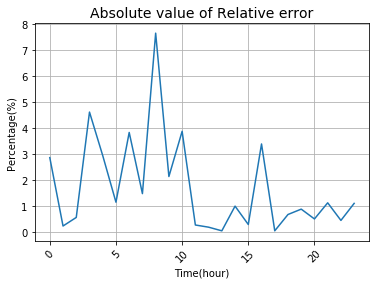

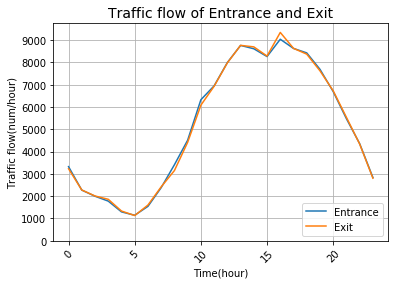

In [2]:
# Set column names and read .csv file
colnames = ['flow_one','flow_two','speed_one','speed_two','time']
data = pd.read_csv('data/Real_data_0106.csv', names=colnames)
flow_one = data.loc[:,'flow_one'].tolist()
flow_two = data.loc[:,'flow_two'].tolist()
time = data.loc[:,'time'].tolist()

# Calculate absolute errors between entrance and exit
num = len(flow_one)
abs_error = np.zeros(num)
for i in range(num):
    abs_error[i] = abs((flow_one[i]-flow_two[i])/flow_one[i])

# Plot absolute errors
plt.plot(time,100*abs_error)
plt.xticks(rotation=45)
plt.title('Absolute value of Relative error', fontsize=14)
plt.xlabel('Time(hour)')
plt.ylabel('Percentage(%)')
plt.yticks(np.arange(9))
plt.grid(True)
plt.show()

# Plot comparison between entrance and exit
plt.plot(time,flow_one,label='Entrance')
plt.plot(time,flow_two,label='Exit')
plt.xticks(rotation=45)
plt.title('Traffic flow of Entrance and Exit', fontsize=14)
plt.xlabel('Time(hour)')
plt.ylabel('Traffic flow(num/hour)')
plt.yticks(np.arange(0,10000,1000))
plt.legend(loc= 'lower right')
plt.grid(True)
plt.show()

The above figures show that traffic flows of Entrance and Exit are almost the same, errors of other time slots are within 5\% except 8am, which verifies the validity of the Linear Partial Differential Equation model. 
<br>
In addition, the error is reasonable, since one exit exists between the two site, some cars would leave the highway through this exit. In the case study, we would add the entrance and exit factors into the model, which could make the model more accord with the actual situation.

### 3.2.2 Validation of equation(3)

The above validation shows that when density stays the same in some road section, the traffic flow stays the same in that section too. However, constant density is an ideal situation. When density varies, we could use equation (3) to describe the road traffic. 
<br>
Specifically, we collect data from four observation stations: 1)I-85 at North Druid Hills Road; 2)I-85/SR403 bn I-285 & Chamblee Tucker Rd, ATL; 3)DI-85 W of Jimmy Carter Blvd @Graves Rd NW, ATL; 4)I-85 btwn Jimmy Carter and Indian Trail, Norcross. Data of these four stations are related to the North direction of I-85.
<br>
We choose one day data from Feb 14, 2019(Thursday). For each station, we have daily flow and daily speed with the time period of one hour. Then we use data of first and fourth stations to calculate value of $u_{max},\rho_{max}$. Further, we use the density of second and third stations to estimate the related traffic flow. Through comparing the real and estimated values, we could prove the validity of equation(3). 

The following code shows us how to calculate value of $u_{max},\rho_{max}$.

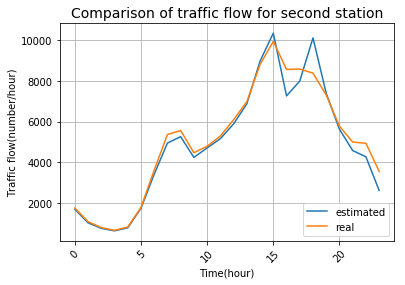

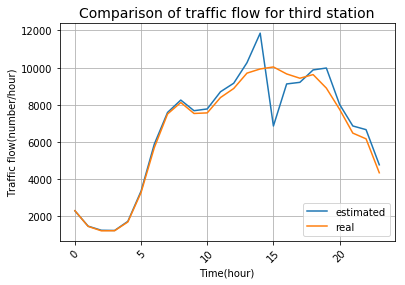

In [3]:
# Set column names
colnames = ['flow_one','flow_two','flow_three','flow_four','speed_one',
            'speed_two','speed_three','speed_four','time']

# Read data from .csv file
data = pd.read_csv('data/Real_data_0214.csv', names=colnames)

# Change data type from dataframe to list
flow_one = data.loc[:,'flow_one'].tolist()
flow_two = data.loc[:,'flow_two'].tolist()
flow_three = data.loc[:,'flow_three'].tolist()
flow_four = data.loc[:,'flow_four'].tolist()

speed_one = data.loc[:,'speed_one'].tolist()
speed_two = data.loc[:,'speed_two'].tolist()
speed_three = data.loc[:,'speed_three'].tolist()
speed_four = data.loc[:,'speed_four'].tolist()
time = data.time.tolist()

# Initialize speed_max and density_max list
num= len(flow_one)
speed_max = [0]*num; density_max = [0]*num
density_one = [0]*num; density_two = [0]*num
density_three = [0]*num; density_four = [0]*num

# Calculate speed_max and density_max
for i in range(num):
    density_one[i] = flow_one[i]/speed_one[i]
    density_two[i] = flow_two[i]/speed_two[i]
    density_three[i] = flow_three[i]/speed_three[i]
    density_four[i] = flow_four[i]/speed_four[i]
    density_max[i] = (density_four[i]*speed_one[i]/speed_four[i]-density_one[i])/(speed_one[i]/speed_four[i]-1)
    speed_max[i] = speed_one[i]*density_max[i]/(density_max[i]-density_one[i])

# Initialize estimated traffic flow list
estimate_flow_two = [0]*num
estimate_flow_three = [0]*num

# Calculate the estimated traffic flow
for i in range(num):
    estimate_flow_two[i] = density_two[i]*speed_max[i]*(1-density_two[i]/density_max[i])
    estimate_flow_three[i] = density_three[i]*speed_max[i]*(1-density_three[i]/density_max[i])

# Plot the real and estimated traffic flow for second station
plt.plot(time,estimate_flow_two, label='estimated')
plt.plot(time,flow_two, label='real')
plt.title('Comparison of traffic flow for second station', fontsize=14)
plt.xlabel('Time(hour)')
plt.ylabel('Traffic flow(number/hour)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc= 'lower right')
plt.show()

# Plot the real and estimated traffic flow for third station
plt.plot(time,estimate_flow_three, label='estimated')
plt.plot(time,flow_three, label='real')
plt.title('Comparison of traffic flow for third station', fontsize=14)
plt.xlabel('Time(hour)')
plt.ylabel('Traffic flow(number/hour)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc= 'lower right')
plt.show()

The Comparison figures show that the real and estimated values for each station are quite similar, so, we can use the Linear Partial Differential Equation to simulate the selected road section on North I-85.

## 3.3 Road traffic simulation

To do traffic simulation, we collect one month(February 2019) data from the same four stations mentioned above. After pre-processing, we get the average daily flow and daily speed of one week(from Monday to Sunday), which means the dataset is an array with a dimension of $24×57$.
<br>
Based on this one-week data, we simulate road traffic for each day separately. Since density varied with location and time, and the above results also verified this, we need to analyze each time slot separately. In this way, each day could be divided into 24 discrete time slots. 
<br>


The below figure shows the position of each station. We set the position of four stations as follows: 0 mile, 5.06 miles, 7.54 miles, 9.71 miles. (Please note that the distances were calculated using Haversine formula)

<br>
<img src="images/station_map.png" style="width: 500px;"/>

In the Validation chapter, we conclude that Linear Partial Differential Equation works during each time slot(every hour), which means traffic flow continues from the first station to the fourth station during each time slot. Thus, for each time slot, data of the four stations could be used to simulate the road traffic from the first station to the fourth station. 
<br>
Specifically, based on the selected day and time slots, the data of four stations are used to get the $u_{max},\rho_{max}$. Then for each time slot, Polynomial fit is used to calculate the density of any position in the road section. At last, Equation(3) is used to calculate the traffic speed of the road section. In this way, we could know the road traffic and better schedule our time.
<br>
Select the date and time slot that you want to inquire the road traffic. (**User-defined**)

In [4]:
# User-defined (Please select the date and time slot that you want to inquire the road traffic)
## Date range: Monday, Tuesday, Wednesday, Thursday, Friday, Staurday, Sunday
date='Monday'; time_slot=[11,16]  # Time slot, Range: 0-23, for example, [14,16] means 2pm, 3pm and 4pm

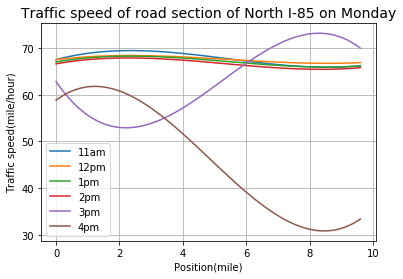

In [5]:
# Set number of columns, each day has 8 columns' data, extra time column
numbers = np.arange(1,7*8+2)

# Set the column names
colnames =[]
for i in range(57):
    colnames.append('column_{}'.format(numbers[i]))

# Read data from .csv file
data = pd.read_csv('data/Real_data_020128.csv', names=colnames)

# Select related data based on the specific date
date_union = {'Monday':1, 'Tuesday':9, 'Wednesday':17, 'Thursday':25,
              'Friday':33, 'Staurday':41, 'Sunday':49}
base = date_union[date]
sel_data = []
for i in range(8):
    sel_data.append('column_{}'.format(base+i))

# Change dataframe to list
flow_one = data.loc[:,sel_data[0]].tolist()
speed_one = data.loc[:,sel_data[1]].tolist()

flow_two = data.loc[:,sel_data[2]].tolist()
speed_two = data.loc[:,sel_data[3]].tolist()

flow_three = data.loc[:,sel_data[4]].tolist()
speed_three = data.loc[:,sel_data[5]].tolist()

flow_four = data.loc[:,sel_data[6]].tolist()
speed_four = data.loc[:,sel_data[7]].tolist()
time = data.column_57.tolist()

# Initialize speed_max and density_max list
num= len(flow_one)
speed_max = [0]*num; density_max = [0]*num
density_one = [0]*num; density_two = [0]*num
density_three = [0]*num; density_four = [0]*num

# Calculate speed_max and density_max
for i in range(num):
    density_one[i] = flow_one[i]/speed_one[i]
    density_two[i] = flow_two[i]/speed_two[i]
    density_three[i] = flow_three[i]/speed_three[i]
    density_four[i] = flow_four[i]/speed_four[i]
    density_max[i] = (density_two[i]*speed_one[i]/speed_two[i]-density_one[i])/(speed_one[i]/speed_two[i]-1)
    speed_max[i] = speed_one[i]*density_max[i]/(density_max[i]-density_one[i])

# Calculate density based on position using Polynomial fit method
xrange = np.arange(0,9.7,0.1)
x_position = [0, 5.06, 7.54, 9.71]
results = []
for i in range(time_slot[0],time_slot[1]+1):
    y_density = [density_one[i], density_two[i], density_three[i], density_four[i]]
    z_coeff = np.polyfit(x_position, y_density, 3)
    fx = np.poly1d(z_coeff)
    results.append(abs(speed_max[i]*(1-fx(xrange)/density_max[i])))

# Plot the traffic speed along selected road section
temp =0
for i in range(len(results)):
    for j in range(len(results[i])):
        if(results[i][j] > 80 or results[i][j] < 10 ):
            temp = 1
            break
    if(temp == 0):
        if(time_slot[0]+i == 12):
            time_lab = '{}pm'.format(12)
        elif(time_slot[0]+i < 12):
            time_lab = '{}am'.format(time_slot[0]+i)
        else:
            time_lab='{}pm'.format(time_slot[0]-12+i)
        plt.plot(xrange, results[i], label=time_lab)
    temp = 0

plt.title('Traffic speed of road section of North I-85 on {}'.format(date), fontsize=14)
plt.xlabel('Position(mile)')
plt.ylabel('Traffic speed(mile/hour)')
plt.legend(loc= 'best')
plt.grid(True)
plt.show()

The above results show the traffic speed distribution on North I-85 from first station to fourth station. Combining this figure with station map, we could know the road traffic of each day of selected road section on North I-85.

# 4. Non-linear model

## 4.1 User-defined

In this section, you are welcome to change the following user-defined parameters. For example, you can change station location if you want to analyze the particular roadway.

In [6]:
# Define input parameters for RK4
t_initial = 0
number_of_iteration = 1
sub_step_size = 0.01

# Define station location information 
station_1_location = [33.82764, -84.34427]  # Station ID = 089-3323
station_2_location = [33.88379, -84.26857]  # Station ID = 089-3332

## 4.2 Georgia DOT data

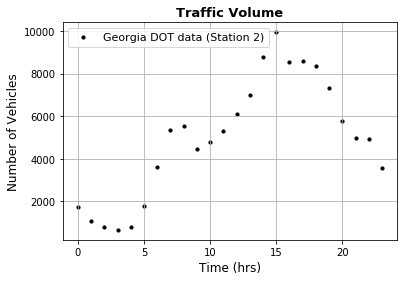

In [7]:
# Import Georgia DOT data
station_1_database = pd.read_csv('data/Station_1_Georgia_DOT_dataset.csv')
station_2_database = pd.read_csv('data/Station_2_Georgia_DOT_dataset.csv')

# Specify input datasets
station_1_database_time = station_1_database['Time']
station_1_database_traffic_volume = station_1_database['Traffic volume']
station_1_database_traffic_speed = station_1_database['Traffic speed']
station_2_database_time = station_2_database['Time']
station_2_database_traffic_volume = station_2_database['Traffic volume']
station_2_database_traffic_speed = station_2_database['Traffic speed']

# Plot station 2 dataset
plt.scatter(station_2_database_time, station_2_database_traffic_volume, marker='o', color='k', s=10, label='Georgia DOT data (Station 2)')
plt.legend(loc='upper left', fontsize = 11)
plt.xlabel('Time (hrs)', fontsize = 12)
plt.ylabel('Number of Vehicles', fontsize = 12)
plt.title('Traffic Volume', weight='bold', fontsize = 13)
plt.grid(True)
plt.show()

As can be seen, the figure shows Atlanta real traffic data at the particular station. For this case, the figure describes number of vehicles from 0 to 24 hours at the station 2 in one day. 

## 4.3 Haversine formula

In order to specify distance between two stations, we would like to propose 'Haversine formula' to calculate the distance. The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes. The formulation is as following:

$$a = sin^2 (\Delta \varphi / 2 + cos \varphi_1 \cdot cos \varphi_2 \cdot sin^2(\Delta \lambda / 2))$$
$$c = 2 \cdot atan2 (\sqrt a, \sqrt{1-a})$$
$$d = R \cdot c$$
<br>
where $\varphi$ is latitude, $\lambda$ is longitude, $R$ is earth's radius (mean radius = 6,371km); note that anales need to be in radians to pass to trig functions! 

In [8]:
# Define a function to calculate the great-circle distance
def haversine(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # Unit: Kilometer
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = radius * c * 0.539957  # 0.539957 is needed to convert from kilometer to nautical mile
    return distance

## 4.4 Runge-Kutta 4th order method

Runge-Kutta(RK) method is known as a method to find numerical solution for ODE. The most widely known member of RK family is generally referred to as RK4, which is fourth-order RK method. The RK4 process is as following: 

1) $t_{n+1} = t_n + h$, where h is a step size;

2) $y_{n+1} = y_n + \dfrac{1}{6} (k_1+ 2k_2 + 2k_3 + k_4)$, where $n = 0, 1, 2, 3...$. Here,
<br>
$$k_1 = h f(t_n, y_n)$$
$$k_2 = h f(t_n + \dfrac{h}{2}, y_n + \dfrac{k_1}{2})$$
$$k_3 = h f(t_n + \dfrac{h}{2}, y_n + \dfrac{k_2}{2})$$
$$k_3 = h f(t_n + h, y_n + k_3)$$
<br>
Thus, we are able to estimate $y_{n+1}$ using $y_n, k_1,k_2, k_3, k_4$ and $h$.  

For more details, we would like to encourage you to read the **hand-written note** 'Runge-Kutta method.pdf' to get better understanding of RK4 method. The pdf file is included in a folder of our GitHub repository. 

In [9]:
# Define ODE (Traffic flow model) 
def f(t,y):
    return -y*((u2-u1)/distance)

# Define RK4 equation 
def RK4(f,t0,y0,h,n):
    
    # Specify an array for x and y
    t_array = [0]*(n+1)
    y_array = [0]*(n+1)
    
    # Implement initial conditions 
    t_array[0] = t = t0  # Otherwise, x is not defined in the equation
    y_array[0] = y = y0
    
    # Do for-loop for the iterative solutions 
    for i in range(1,n+1):
        
        # Calculate K(i) values 
        k1 = h*f(t,y)
        k2 = h*f(t+0.5*h, y+0.5*k1)
        k3 = h*f(t+0.5*h, y+0.5*k2)
        k4 = h*f(t+h, y+k3)
        
        # Update x and y iteratively 
        t_array[i] = t = t0+i*h 
        y_array[i] = y = y_array[i-1]+(1.0/6.0)*(k1+2*k2+2*k3+k4)
    
    # Return the x and y array 
    return y_array[n]

## 4.5. Simulation

In this section, the Python code will be simulating with Runge-Kutta 4th order method in order to estimate traffic volume at the particular station from 00:00 to 23:00. The results will be visualized in 'Validation' section.

In [10]:
# Convert Pandas to Numpy dataframe for traffic speed
station_1_database_traffic_speed_array = np.array(station_1_database_traffic_speed)
station_2_database_traffic_speed_array = np.array(station_2_database_traffic_speed)

# Create an empty array to save the datasets
y1_initial = np.empty([len(station_1_database_time)])
y2 = np.empty([len(station_1_database_time)])
y2_approximation = np.empty([len(station_1_database_time)])
best_step_size = np.empty([len(station_1_database_time)])
traffic_flow_approximation = np.empty([len(station_1_database_time)]) 

# Define the first row data for station 2
y2[0] = (station_2_database_traffic_volume[0]) / (station_2_database_traffic_speed[0])
y2_approximation[0] = y2[0]  # Technically, we do not predict the first row value 
traffic_flow_approximation[0] = y2[0] * station_2_database_traffic_speed_array[0]

# Do for-loop for calculating all 24 hours cases
for i in range(0, len(station_1_database_time)-1):

    # Specify traffic speed for both station 1 and 2
    u1 = station_1_database_traffic_speed_array[i]
    u2 = station_1_database_traffic_speed_array[i+1]

    # Define distance between station 1 and 2
    distance = haversine(station_1_location, station_2_location)

    # Specify an initial value for traffic density
    y1_initial[i] = (station_1_database_traffic_volume[i]) / (station_1_database_traffic_speed[i])

    # Create an array with different step sizes 
    step_size = np.arange(0, 100, sub_step_size)

    # Calculate all possible y values according to the step size array
    y_step_size_test = np.empty([len(step_size)])
    for j in range(0, len(step_size)):
        y_step_size_test[j] = RK4(f, t_initial, y1_initial[i], step_size[j], number_of_iteration)

    # Find the best step size and calculate approximate traffic density
    y2[i+1] = (station_2_database_traffic_volume[i+1]) / (station_2_database_traffic_speed[i+1])
    y2_approximation[i+1] = min(y_step_size_test, key=lambda x:abs(x-y2[i+1]))
    #best_step_size[i] = np.where(y_step_size_test == y2_approximation[i])

    # Estimate approximate traffic volume (or traffic flow)
    traffic_flow_approximation[i+1] = y2_approximation[i+1] * station_2_database_traffic_speed_array[i+1] 

## 4.6 Validation

In this section, you will see how the simulation results are validated against the real data (Georgia DOT).

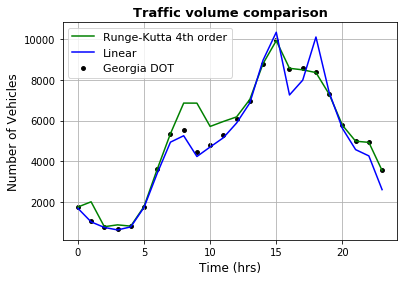

In [11]:
# Import results from linear model
linear_model_result = pd.read_csv('data/Linear_model_results.csv')

# Specify results at the particular station 
linear_station_2 = linear_model_result['station2']

# Plot real vs. simulation results
plt.scatter(station_2_database_time, station_2_database_traffic_volume, marker='o', color='k', s=15, label='Georgia DOT')
plt.plot(station_2_database_time, traffic_flow_approximation, color='g', label='Runge-Kutta 4th order')
plt.plot(station_2_database_time, linear_station_2, color='b', label='Linear')
plt.legend(loc='upper left', fontsize = 11)
plt.xlabel('Time (hrs)', fontsize = 12)
plt.ylabel('Number of Vehicles', fontsize = 12)
plt.title('Traffic volume comparison', weight='bold', fontsize = 13)
plt.grid(True)
plt.show()

From the figure shown above, we see that both linear and non-linear model fit the real data well. From 15:00 to 19:00, the result of RK4 model is better than the result of linear model compared with the real data. This is because the traffic is heavy in this time interval such that the assumption of the linear model may not satisfy. This results also satisfy our expectations that the non-linear model is more accurate.

## 4.7 Roadway visualization

In this section, you will see where the roadway is in the United States. You can change the region of the United States if necessary. 

In [12]:
# User-defined 
long_min = -125
long_max = -75
lat_min = 24
lat_max = 50

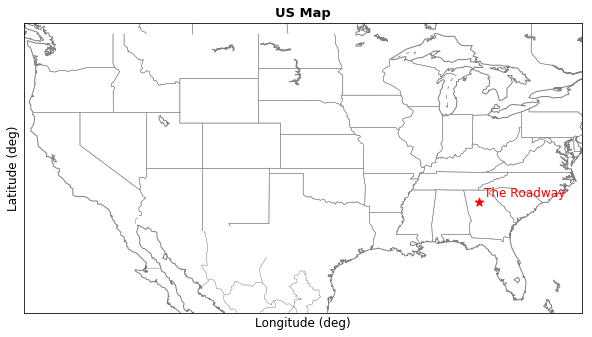

In [13]:
# Plot the United States
plt.figure(figsize=(10,8))
map = Basemap(llcrnrlon=long_min, llcrnrlat=lat_min, urcrnrlon=long_max, urcrnrlat=lat_max, resolution='l')  
map.drawcoastlines(color='gray')
map.drawstates(color='gray')
map.scatter(station_2_location[1], station_2_location[0], marker='*', color='r', s=80)  
plt.text(station_2_location[1]+0.5, station_2_location[0]+0.5, 'The Roadway', fontsize=12, color='r')
plt.xticks(size=11)
plt.yticks(size=11)
plt.title('US Map', weight='bold', fontsize=13)
plt.xlabel('Longitude (deg)', fontsize = 12)
plt.ylabel('Latitude (deg)', fontsize = 12)
plt.show()

## 4.8 Traffic density visualization

In this section, you will see how the traffic density varies as time changes at the roadway. Please keep in mind that we assume the criterion of traffic density level is equal to 100. In other words, we indicate that the traffic is free if the simulated traffic density is less than the criterion. In a similar way, we indicate that the traffic is busy with red color if the simulated traffic density is greater than the criterion. You can change the criterion of traffic density level when necessary. 

In [14]:
# User-defined
criterion_number = 100 

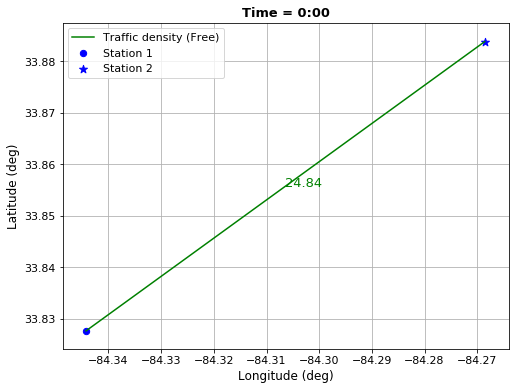

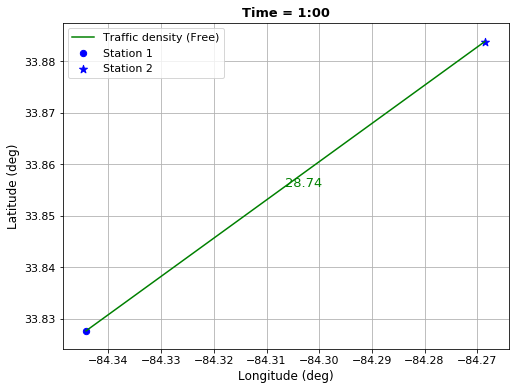

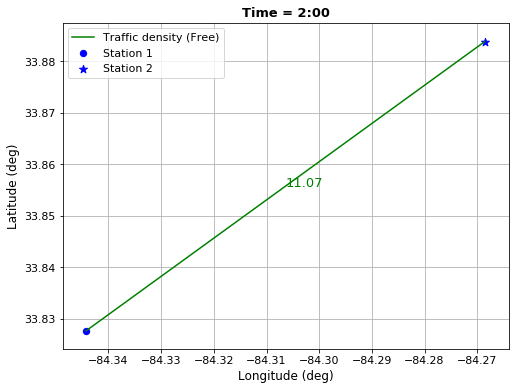

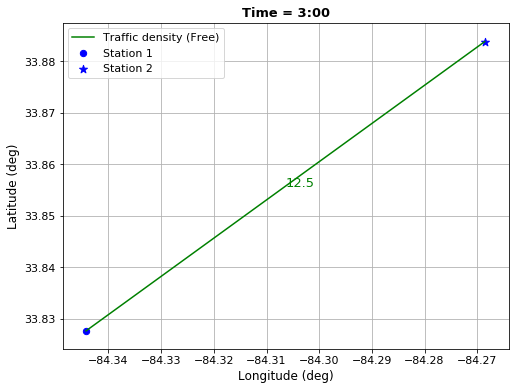

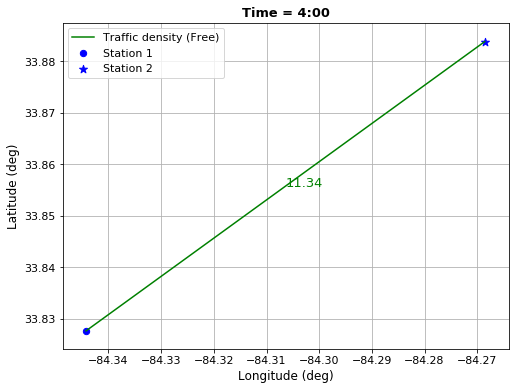

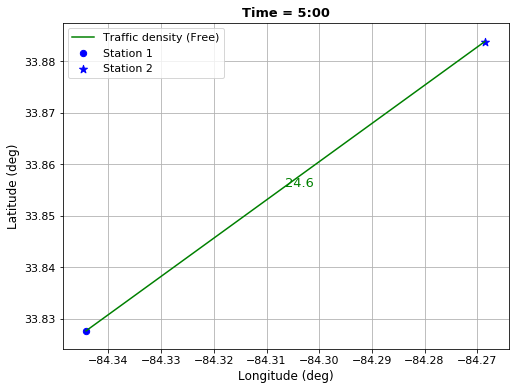

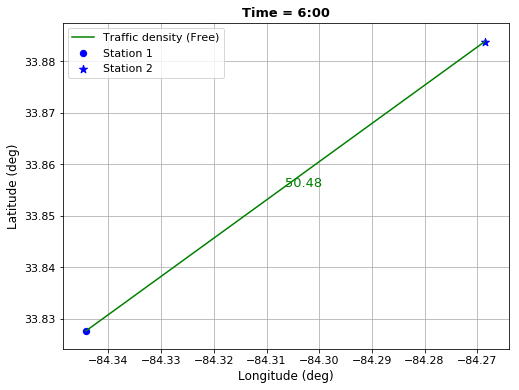

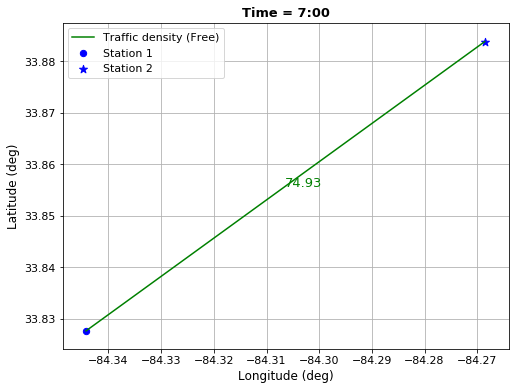

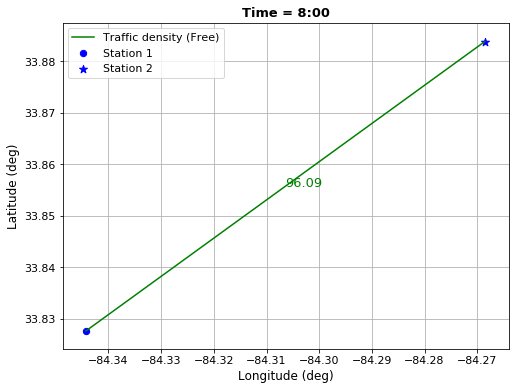

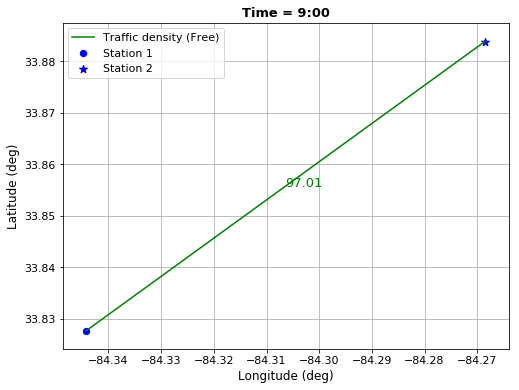

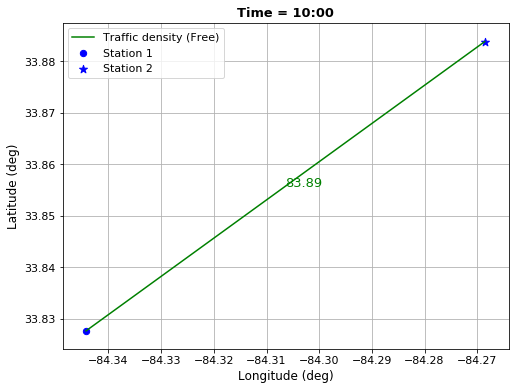

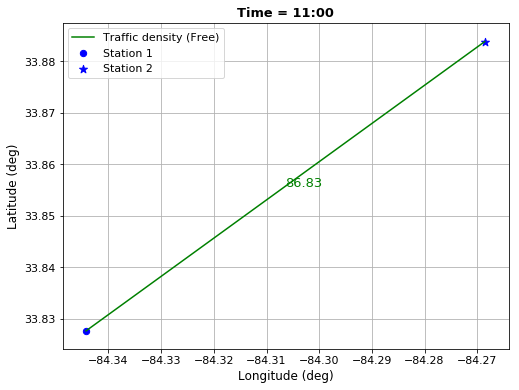

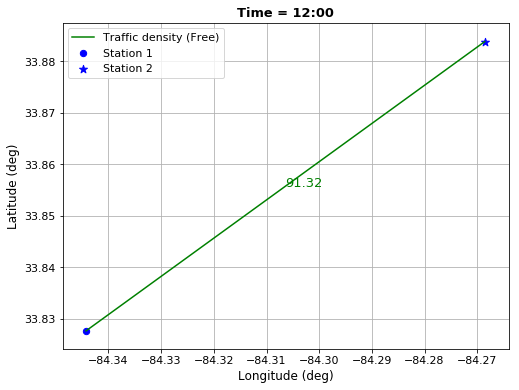

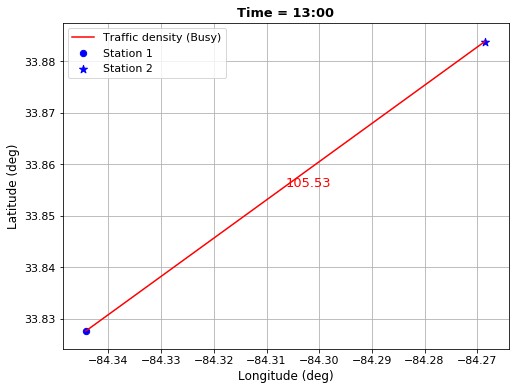

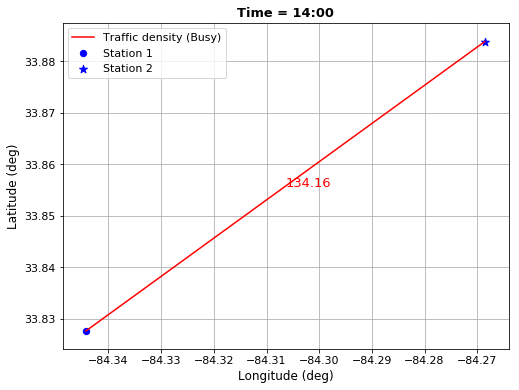

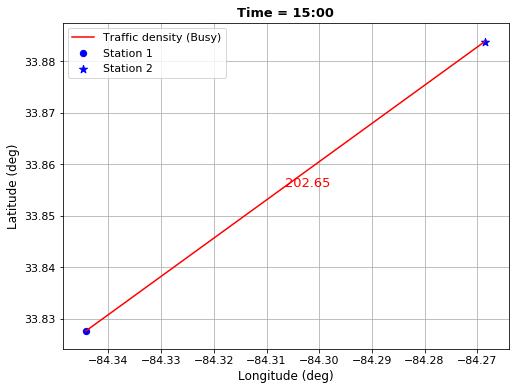

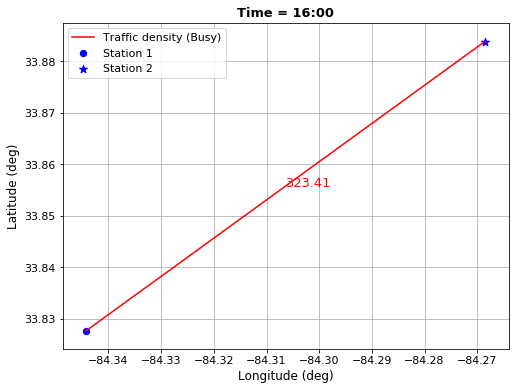

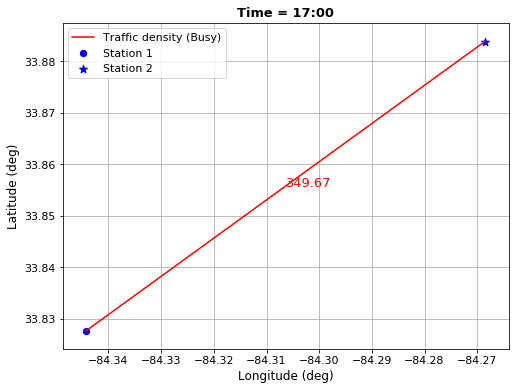

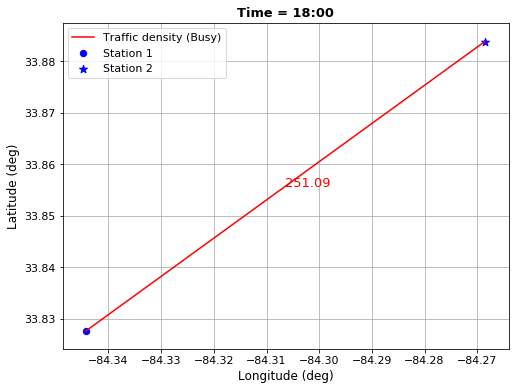

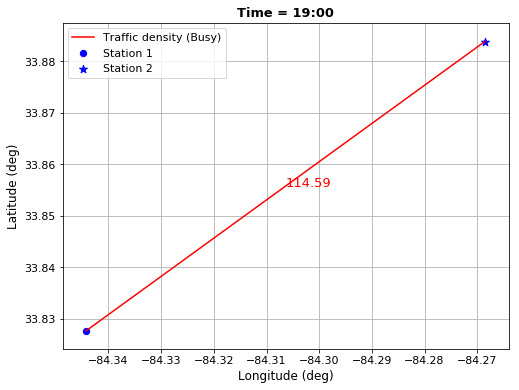

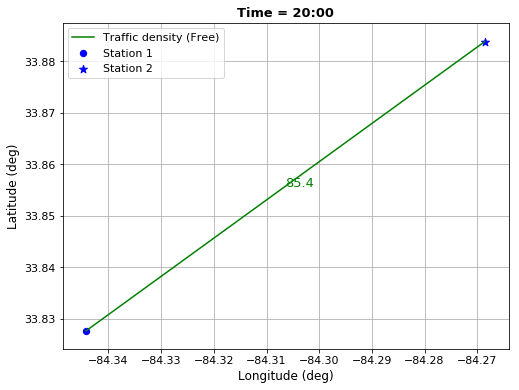

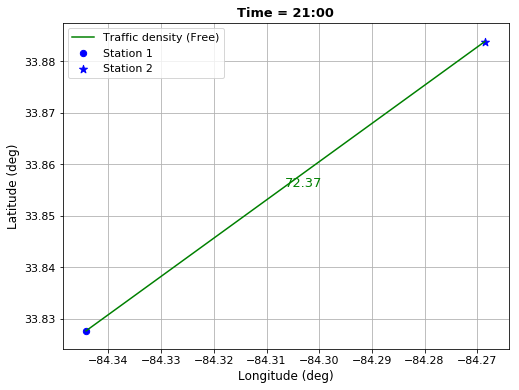

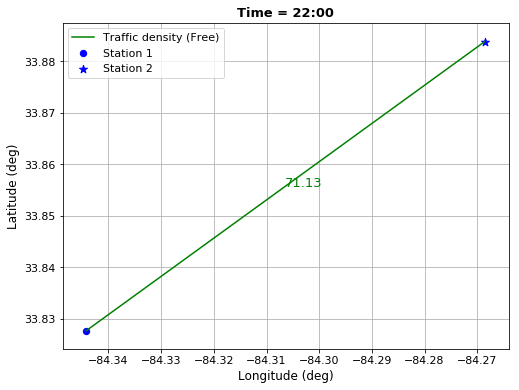

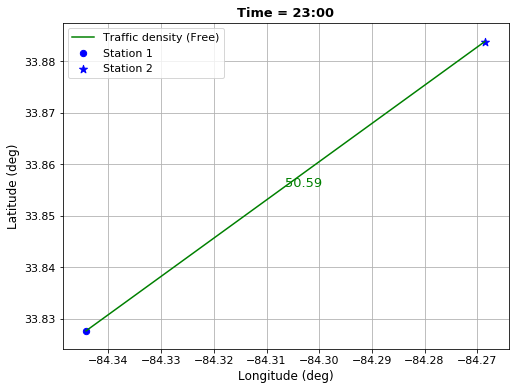

In [15]:
# Specify vectors for the stations
stations_longitude = [station_1_location[1], station_2_location[1]] 
stations_latitude = [station_1_location[0], station_2_location[0]] 

# Create a dictionary to save the indicators
traffic_density_color = dict()
traffic_density_label = dict()

# Do for-loop to create multiple plots with different traffic density levels
for i in range(0, len(station_1_database_time)):
    
    # Determine a criterion to indicate the level of traffic density
    if y2_approximation[i] > criterion_number:
        traffic_density_color[i] = 'r' 
        traffic_density_label[i] = 'Traffic density (Busy)'
    elif y2_approximation[i] < criterion_number:
        traffic_density_color[i] = 'g' 
        traffic_density_label[i] = 'Traffic density (Free)'

    # Plot the given roadway and traffic density 
    plt.figure(figsize=(8,6))
    plt.plot(stations_longitude, stations_latitude, color=traffic_density_color[i], lw=1.5, label=traffic_density_label[i])
    plt.scatter(station_1_location[1], station_1_location[0], color='b', marker='o', s=40, label='Station 1')
    plt.scatter(station_2_location[1], station_2_location[0], color='b', marker='*', s=70, label='Station 2')
    plt.text((station_2_location[1]+station_1_location[1])/2, (station_2_location[0]+station_1_location[0])/2, round(y2_approximation[i],2), fontsize=13, color=traffic_density_color[i])
    plt.legend(loc='upper left', fontsize = 11)
    plt.xticks(size=11)
    plt.yticks(size=11)
    plt.title('Time = ' +str(i)+':00', weight='bold', fontsize=13)
    plt.xlabel('Longitude (deg)', fontsize = 12)
    plt.ylabel('Latitude (deg)', fontsize = 12)
    plt.grid(True)
    #plt.savefig('Time'+str(i)+':00.png', dpi=250)
    plt.show()
    #plt.close()

**Please note that we made the animation with those figures generated as above, which is included in a folder of our GitHub repository.**

# 5. Non-homogeneous model
Now we consider more complex condition on traffic. We will analyze the effect of traffic light as well as the effect of entrance and exit.

## 5.1 Traffic Light

We set a traffic light on $x=0$. Assume that traffic is moving at a constant density of $\rho_0$, and then traffic is stopped at $x=0$ for a finite amount time $\tau$ because of red light. Thus, the cars at $x>0$ will move constantly, yet the cars at $x<0$ will stop one by one. If the traffic light becomes red at $t=0^{+}$, then the light will turn green when $t = \tau$.

The following processes show how the traffic density $\rho(x,t)$ will be affected during this traffic light change, and we can work out the questions like "when will the traffic congestion disappear" and "how long the stopped cars at $x<0$ can keep up with the cars at $x>0$".

In [16]:
# Fixed parameters
# These parameters are achieved from the real data.
pmax = 80
p0 = 30
umax = 50
tau = 1/30
x = np.arange(-5, 5, 0.01)

### 1) $t \leq 0^-$
Based on our assumption, $\rho(x,0) = \rho_0 (constant)$. Here we analyse the light traffic, which means the initial density is smaller than the density $\rho^*$ corresponds to the capacity of the road, so $\rho_0 < \rho^* = \dfrac{\rho_{max}}{2}$.

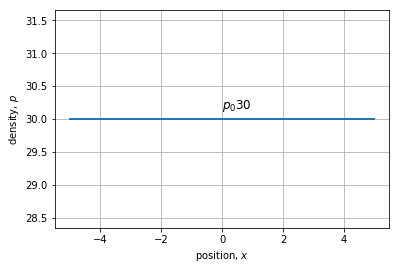

In [17]:
p = np.zeros(len(x))
for i in range(len(x)):
    p[i] = p0
plt.plot(x, p, linewidth=2.0)
plt.xlabel('position, $x$')
plt.ylabel('density, $p$')
plt.annotate(r'$p_0 %s$'% p0,xy = (0,p0),xycoords = 'data',
             xytext=(0,+10),textcoords = 'offset points',fontsize = 12)
plt.grid(True)
plt.show()

### 2) $0^+ \leq t < \tau$.
During this time interval, the traffic light turns red.

Behind the red light $x<0$, cars line up and stop; in front of the light, the initial density is still $\rho_0$. Thus, it is as thought the light seperates traffic of zero density and max density $\rho_{max}$. We set a line called left interruption line $x = x_{sl}(t)$. In this coniguration the ligher traffic ($\rho=0$) is behind heavier traffic ($\rho = \rho_0$) and hence a **shock** forms between the faster moving density wave with density zero $\rho = 0$ and the density wave with density $\rho = \rho_0$. Similarly, we set a line called left interruption line $x = x_{sl}(t)$.

At the interruption point $x_s$, we denote the jump value of $\rho$ and $q$ as
$$[\rho] = \rho^+ - \rho^-, [q] = q^+ - q^-.$$
Then, due to the traffic flow relative to the moving shock on one side of the shock equals the relative flow on the other side,
$$\dfrac{d x_s}{dt} = \dfrac{[q]}{[\rho]}.$$

For $x = x_{sl}(t)$, $[\rho] = \rho_{max} - \rho_0, [q] = q(\rho_{max}) - q(\rho_0).$ By the eqution(3) at the 3.2, that is $q=\rho u_{max}(1-\dfrac{\rho}{\rho_{max}})$, then $[q] = - \dfrac{u_{max} \rho_0 (\rho_{max} - \rho_0)}{\rho_{max}}$. Thus, 
$$\dfrac{d x_{sl}}{dt} = - \dfrac{u_{max} \rho_0}{\rho_{max}}, x_{sl}(0) = 0.$$

The solution is
$$x_{sl}(t) = -\dfrac{u_{max} \rho_0}{\rho_{max}}t.$$


For $x = x_{sr}(t)$, $[\rho] = \rho_0$, $[q] = \dfrac{u_{max} \rho_0 (\rho_{max} - \rho_0)}{\rho_{max}}$.
Thus, $$\dfrac{d x_{sr}}{dt} = - \dfrac{u_{max} \rho_0}{\rho_{max}}, x_{sr}(0) = 0.$$

The solution is
$$x_{sr}(t) = \dfrac{u_{max} (\rho_{max} - \rho_0)}{\rho_{max}}t.$$

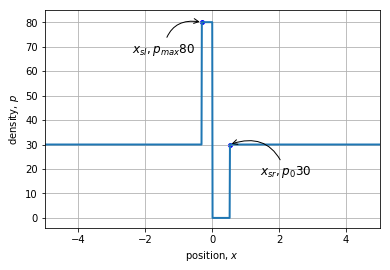

In [18]:
# Time
t = tau/2

# Special locations
xsl = -(umax * p0) / pmax * t
xsr = umax * (pmax - p0) * t /  pmax

# Density Curve
p = np.zeros(len(x))
for i in range(len(x)):
    if(x[i]<xsl):
        p[i] = p0
    elif(x[i]>=xsl and x[i]<=0):
        p[i] = pmax
    elif(x[i]>0 and x[i]<xsr):
        p[i] = 0
    elif(x[i]>=xsr):
        p[i] = p0

# Plot
plt.plot(x, p, linewidth=2.0)
plt.xlabel('position, $x$')
plt.ylabel('density, $p$')
plt.scatter([xsl],[pmax],s = 15,color='b')
plt.annotate(r'$x_{sl}, p_{max} %s$'% pmax,xy = (xsl,pmax),xycoords = 'data',
             xytext=(-70,-30),textcoords = 'offset points',fontsize = 12
             ,arrowprops = dict(arrowstyle='->',
                                connectionstyle="arc3,rad=-.5"))
plt.scatter([xsr],[p0],s = 15,color='b')
plt.annotate(r'$x_{sr}, p_0 %s$'% p0,xy = (xsr,p0),xycoords = 'data',
             xytext=(+30,-30),textcoords = 'offset points',fontsize = 12
             ,arrowprops = dict(arrowstyle='->',
                                connectionstyle="arc3,rad=.5"))
plt.xlim(-5,5)
plt.grid(True)
plt.show()

The figure shows the density curve versus the position.

### 3) $t = \tau$
The light turns green, so the cars stop at $x<0$ begin to move. Therefore, $x_{sl} (t)$ moves backward and $x_{sr} (t)$ moves forward.

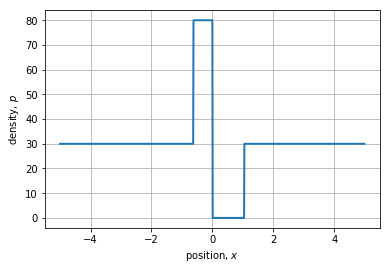

In [19]:
# Time
t = tau

# Special locations
xsl = -(umax * p0) / pmax * t
xsr = umax * (pmax - p0) * t /  pmax

# Density Curve
p = np.zeros(len(x))
for i in range(len(x)):
    if(x[i]<xsl):
        p[i] = p0
    elif(x[i]>=xsl and x[i]<=0):
        p[i] = pmax
    elif(x[i]>0 and x[i]<xsr):
        p[i] = 0
    elif(x[i]>=xsr):
        p[i] = p0

# Plot
plt.plot(x, p, linewidth=2.0)
plt.xlabel('position, $x$')
plt.ylabel('density, $p$')
plt.grid(True)
plt.show()

### 4) $t>\tau$

Currently, the first car after the light moves at the fastest speed $u_{max}$, and hence catches up to the traffic of density $\rho_0$. The line of stopped cars decreased at the speed $u_{max}$, but the line is being increased at the speed $\dfrac{\rho_0 u_{max}}{\rho_{max}}$ which is less than $u_{max}$. Eventually, the total line of stopped cars dissipates.

We set $x_1(t)$ as the position of the first car, where $\rho = 0$ changes to $\rho > 0$; $x_2(t)$ as the position of the last car of stopped lines, where $\rho < \rho_{max}$ changes to $\rho = \rho_{max}$.

Since first car moves at the fasetest speed, so $$x_1(t) = u_{max} (t - \tau).$$
Similarly, $$x_2(t) = - u_{max} (t - \tau)$$

Extend the eqution on 3.2, we can get 
$$\dfrac{dx}{dt} = \dfrac{dq}{d\rho} = u_{max}(1-\dfrac{2\rho}{\rho_{max}}).$$
Thus, $$x = u_{max}(1-\dfrac{2\rho}{\rho_{max}}) (t - \tau).$$
Finally, we get the density is
$$\rho(x,t) = \dfrac{\rho_{max}}{2} [1 - \dfrac{x}{u_{max}(t-\tau)}] ,x_2(t) \leq x \leq x_1(t).$$

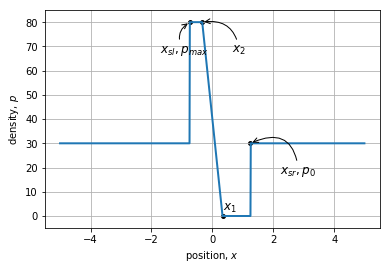

In [20]:
# Time
t = tau * 1.2

# Special locations
xsl = -(umax * p0) / pmax * t
xsr = umax * (pmax - p0) * t /  pmax
x1 = umax * (t - tau)
x2 = -umax * (t - tau)

# Density Curve
p = np.zeros(len(x))
for i in range(len(x)):
    if(x[i]<xsl):
        p[i] = p0
    elif(x[i]>=xsl and x[i]<=x2):
        p[i] = pmax
    elif(x[i]>x2 and x[i]<x1):
        p[i] = pmax / 2.0 * (1 - x[i] / (umax * (t - tau)))
    elif(x[i]>=x1 and x[i] <= xsr):
        p[i] = 0
    elif(x[i] > xsr):
        p[i] = p0

# Plot
plt.plot(x, p, linewidth=2.0)
plt.xlabel('position, $x$')
plt.ylabel('density, $p$')
plt.scatter([xsl],[pmax],s = 15,color='black')
plt.annotate(r'$x_{sl},p_{max} $',xy = (xsl,pmax),xycoords = 'data',
             xytext=(-30,-30),textcoords = 'offset points',fontsize = 12
             ,arrowprops = dict(arrowstyle='->',
                                connectionstyle="arc3,rad=-.5"))
plt.scatter([x2],[pmax],s = 15,color='black')
plt.annotate(r'$x_2$',xy = (x2,pmax),xycoords = 'data',
             xytext=(+30,-30),textcoords = 'offset points',fontsize = 12
             ,arrowprops = dict(arrowstyle='->',
                                connectionstyle="arc3,rad=.5"))

plt.scatter([x1],[0],s = 15,color='black')
plt.annotate(r'$x_1$',xy = (x1,0),xycoords = 'data',
             xytext=(+0,+5),textcoords = 'offset points',fontsize = 12)
plt.scatter([xsr],[p0],s = 15,color='black')
plt.annotate(r'$x_{sr}, p_0$',xy = (xsr,p0),xycoords = 'data',
             xytext=(+30,-30),textcoords = 'offset points',fontsize = 12
             ,arrowprops = dict(arrowstyle='->',
                                connectionstyle="arc3,rad=.7"))
plt.grid(True)
plt.show()

Now we are facing two special time point need to be computed:
1. When the line of stopped cars completely dissipates? ($t = t_d$)
2. When the first car of the stopped line catches up to the uniformly moving traffic? ($t = t_u$)

Dut to the expression of $x_1(t)$ and $x_2(t)$ above, $x_1(t)$ moves forward with the speed $u_{max}$ and $x_1(t)$ moves backward with the speed $u_{max}$. Meanwhile, Dut to the expression of $x_{sr}(t)$ and $x_{sl}(t)$ above, $x_{sr}(t)$ moves forward with the speed $\dfrac{u_{max} (\rho_{max} - \rho_0)}{\rho_{max}}$ and $x_{sl}(t)$ moves backward with the speed $\dfrac{u_{max} \rho_0}{\rho_{max}}.$ Based on the light traffic condition ($\rho_0 < \dfrac{\rho_{max}}{2}$), $x_2(t)$ will catch up with $x_{sl}(t)$ first, and this time stamp is $t_d$. Based on $x_{sl}(t_d) = x_2(t_d)$, we have
$$t_d = \dfrac{\tau}{1-\dfrac{\rho_0}{\rho_{max}}}.$$

When $x_1(t)$ catch up with $x_{sr}(t)$, the first car catches up to the uniformly moving traffic, so $x_{sr}(t_u) = x_1(t_u)$, and the solution is
$$t_u = \dfrac{\rho_{max} \tau}{\rho_0}.$$

#### 4.1) $t = t_d$
$x_2(t)$ will catch up with $x_{sl}(t)$.

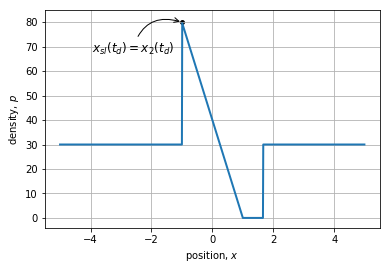

In [21]:
# Time
td = tau / (1 - p0 / pmax) * 1.0
t = td

# Special locations
x1 = umax * (t - tau)
x2 = -umax * (t - tau)
xsl = -(umax * p0) / pmax * t
xsr = umax * (pmax - p0) * t /  pmax * 1.0

# Density curve
p = np.zeros(len(x))
for i in range(len(x)):
    if(x[i]<xsl):
        p[i] = p0
    elif(x[i]>xsl and x[i]<x1):
        p[i] = (pmax / 2.0) * (1 - x[i] / (umax * (t - tau)))
    elif(x[i]>=x1 and x[i] <= xsr):
        p[i] = 0
    elif(x[i] > xsr):
        p[i] = p0

# Plot
plt.plot(x, p, linewidth=2.0)
plt.xlabel('position, $x$')
plt.ylabel('density, $p$')
plt.scatter([xsl],[pmax],s = 15,color='black')
plt.annotate(r'$x_{sl} (t_d)= x_2 (t_d) $',xy = (xsl,pmax),xycoords = 'data',
             xytext=(-90,-30),textcoords = 'offset points',fontsize = 12
             ,arrowprops = dict(arrowstyle='->',
                                connectionstyle="arc3,rad=-.5"))
plt.grid(True)
plt.show()

#### 4.2) $t = t_u$

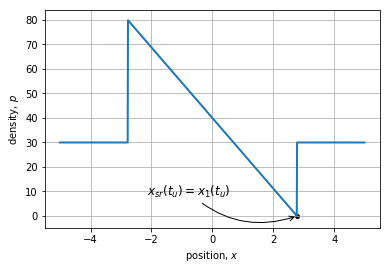

In [22]:
# Time
tu = pmax * tau / (p0 * 1.0)
t = tu

# Special positions
x1 = umax * (t - tau)
x2 = -umax * (t - tau)
xsl = x2
xsr = umax * (pmax - p0) * t /  pmax * 1.0

# Density curve
p = np.zeros(len(x))
for i in range(len(x)):
    if(x[i]<xsl):
        p[i] = p0
    elif(x[i]>xsl and x[i]<x1):
        p[i] = (pmax / 2.0) * (1 - x[i] / (umax * (t - tau)))
    elif(x[i]>=x1 and x[i] <= xsr):
        p[i] = 0
    elif(x[i] > xsr):
        p[i] = p0

# Plot
plt.plot(x, p, linewidth=2.0)
plt.xlabel('position, $x$')
plt.ylabel('density, $p$')
plt.scatter([xsr],[0],s = 15,color='black')
plt.annotate(r'$x_{sr} (t_u)= x_1 (t_u) $',xy = (xsr,0),xycoords = 'data',
             xytext=(-150,+20),textcoords = 'offset points',fontsize = 12
             ,arrowprops = dict(arrowstyle='->',
                                connectionstyle="arc3,rad=.3"))
plt.grid(True)
plt.show()

#### 4.3) $t = t^*$

When $x_{sl} (t)$ moves to $x = 0$, the density at $x = 0$ decreases to the initial constant density $\rho = \rho_0$, so we can view the traffice at $x = 0$ recovers to the original condition. We set this time point as $t = t^*$.
$$t^* = \dfrac{\tau}{(1 - \dfrac{2\rho_0}{\rho_{max}})^2}.$$
The smaller the $\dfrac{\rho_0}{\rho_{max}}$ and red light time $\tau$, the quicker the traffic will recover.
If  $\dfrac{\rho_0}{\rho_{max}} = \dfrac{1}{4}$, $t^* = 4\tau$. Thus, if $\tau = 2$ min, then the traffic needs 8min to recover.

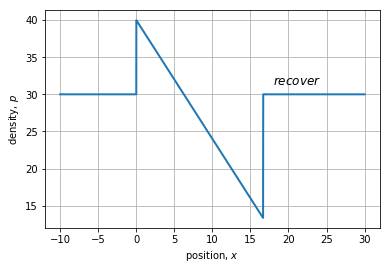

In [23]:
# Time
x = np.arange(-10, 30, 0.01)
tstar = tau / ((1 - 2*p0 / pmax) **2)
t = tstar

# Special positions
xsl = -(umax * p0) / pmax * t
xsr = umax * (pmax - p0) * t /  pmax * 1.0

# Density curve
p = np.zeros(len(x))
for i in range(len(x)):
    if(x[i]<0):
        p[i] = p0
    elif(x[i]>xsl and x[i]<xsr):
        p[i] = (pmax / 2.0) * (1 - x[i] / (umax * (t - tau)))
    elif(x[i]>=xsr):
        p[i] = p0

# Plot       
plt.plot(x, p, linewidth=2.0)
plt.xlabel('position, $x$')
plt.ylabel('density, $p$')
plt.annotate(r'$recover $',xy = (xsr,p0),xycoords = 'data',
             xytext=(+10,+10),textcoords = 'offset points',fontsize = 12)
plt.grid(True)
plt.show()

## 5.2 Entrances and Exit

Now, let us consider another common condition on traffic: entrances and exit. 
relax one of our original assumptions for the simple model, that is no entrances and exits. Currently, we allow entrances and exits, which indicates that the rate of change of cars between two location $x_1$ and $x_2$ not only from cars passing through $x_1$ and $x_2$, but also from cars entering or exiting the road between $x = x_1$, and $x = x_2$. 

### 5.2.1 Constantly Entering Cars

Now, we give a new assumption that the number of cars per hour entering per mile of roadway is a constant $\beta_0$, then the traffic density at all times must satisfy the following **partial differential equation**:
$$ \dfrac{\partial \rho}{\partial t}+\dfrac{dq}{d\rho}  \dfrac{\partial \rho}{\partial x}= \beta_0.$$

The density is not constant along the characteristic but depends linearly on time.

The density is given by
$$ \rho = \beta_0 t + \rho_0.$$

However, we are still unable to know what value $\rho_0$ should be unless the characteristics are known.

### 5.2.2 Linearization
To determine the characteristic curves, with the same discussion at 3.2, we assume that the linear velocity-density relationship, $u=u_{max}(1-\dfrac{\rho}{\rho_{max}})$ is valid. Then, the characteristics satisfy the following ordinary differential equation:
$$\dfrac{dx}{dt} = u_{max} (1-\dfrac{2\beta_0 t + 2 \rho_0}{\rho_{max}}).$$

By integrating this equation, the characteristics are parabolas as
$$x = u_{max}(1-\dfrac{2\rho_0}{\rho_{max}})t-\beta_0\dfrac {u_{max}}{\rho_{max}}t^2 + x_0,$$ where $x_0$ is the initial position of the parabolic characteristic.

Now, we can draw the parabolic characteristics if we know the initial distribution of traffic density.

In [24]:
# Fixed parameters
# They are achieved based on the real data.
umax = 80
pmax = 80
u0 = 40
p0 = 30
b0 = 3
x0 = 10

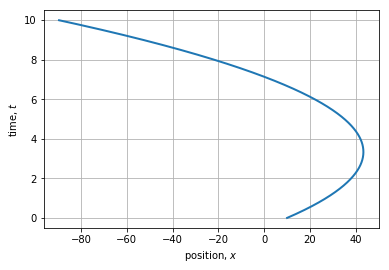

In [25]:
# Plot parabolic characteristics
t = np.arange(0.0, 10, 0.01)
x = umax * (1 - (2 * p0 / pmax)) * t - b0 * (umax / pmax) * t * t + x0
plt.plot(x, t, linewidth=2.0)
plt.xlabel('position, $x$')
plt.ylabel('time, $t$')
plt.grid(True)
plt.show()

## 5.3  High way Entrance

### 5.3.1 Background and assumptions
In this section, we will solve a problem involving traffic entering a highway. Still, we assume a linear velocity-density relationship, then traffic density satisfies
$$ \dfrac{\partial \rho}{\partial t} + u_{max} (1 - \dfrac{2\rho}{\rho_{max}}) \dfrac{\partial \rho}{\partial x} = \beta.$$

We suppose care are entering the road in some finite region $0 < x < x_E$ at a constant rate $\beta_0$ per mile for all time.

For the characteristics parabola emanating at $x=0$ at $t=0$, the maximum value of $x$ occurs when $\dfrac{dx}{dt}=0$, thus $t = \dfrac{\rho_{max}}{2 \beta_0}$, and $x = \dfrac{u_{max} \rho_{max}}{4 \beta_0}$.

Since $\beta_0 x_E$ is the total flow of cars coming in the entrance, we assume that this flow is less than the maximum capacity of the road, that is
$$\dfrac{u_{max} \rho_{max}}{4} > \beta_0 x_E.$$

### 5.3.2 Formula derivation

The method of characteristics discussed above implise that
$\dfrac{d \rho}{d t} = \beta,$ when $\dfrac{dx}{dt} = u_{max} (1 - \dfrac{2 \rho}{\rho_{max}})$.

When $x<0$ and $x > x_E$, $\beta = 0$, so the characteristics are straight lines corresponding to a constant density wave velocity.

When $0 < x < x_E$ (the entrace region of the highway with $\beta = \beta_0$), the characteristics are parabolas. Some of these parabolas start at $t=0$ at $x=x_0$ from regions of zero traffic densirt in which case
$$\rho = \beta_0 t, [1]$$
$$x = u_{max}t - \beta_0 \dfrac{u_{max}} {\rho_{max}} t^2 + x_0.$$

These parabolas differ from each other by a constant translation in $x$. The density is increasing in time as cars enter. Other parabolas emanate from $x=0$ at some values of $t = \tau$ at which $\rho = 0$. For these characteristics, while they are in the region in which $\beta = \beta_0$,
$$\rho = \beta_0 (t-\tau),$$
$$x = u_{max} (t-\tau) - \beta_0 \dfrac{u_{max}} {\rho_{max}} (t-\tau)^2.$$
By elimination $\tau$ from the above two equtions, we can get

$$x = \dfrac{u_{max} \rho_{max}}{\beta_0} (\dfrac{\rho}{\rho_{max}} - \dfrac{\rho^2}{\rho_{max} ^2}). [2]$$

The density at $x = x_E$ is
$$\rho = \beta_0 t_E,$$
where $t = t_E$ is the time that the characteristics intersects the end of the entrance region.

In general, 
$$x_E = u_{max}t_E - \beta_0 \dfrac{u_{max}}{\rho_{max}} t_E^2 + x_0.$$
Thus,
$$t_E = \dfrac{1 - \sqrt{1-\dfrac{4 \beta_0 (x_E - x_0)}{\rho_{max} u_{max}}}} {2 \beta_0 / \rho_{max}}$$

At $x = x_E$, the traffic becomes denser and hence moves more slowly until $t=t_E(x_0=0)$. After leaving the entrance region, the velocity of the characteristics is
$$\dfrac{dx}{dt} = u_{max} (1 - \dfrac{2 \rho}{\rho_{max}}),$$ and $\rho$ is constant $\beta_0 t_E$ ($t_E = \dfrac{\rho}{\beta_0}$). Consequently,
$$x = u_{max} (1-2\dfrac{\rho}{\rho_{max}}) (t - \dfrac{\rho}{\beta_0}) + x_E. [3]$$
At $x_E$, for $t \ge t_E$, the density is the same, we have
$$\rho = \dfrac{\rho_{max}}{2} (1 - \sqrt{1-\dfrac{4 \beta_0 x_E}{\rho_{max} u_{max}}}). [4]$$

### 5.3.3 Density curves
The following figures are the traffic density at different fixed times.

In [26]:
# Fixed parameters
# They are achieved from the real world data.
umax = 12
pmax = 80
u0 = 4
p0 = 30
b0 = 6
x0 = 5
x_E = 25
#compute rho
t_E = (1 - np.sqrt(1 - (4*b0*(x_E - x0)) / (pmax * umax)))  / (2*b0 / pmax)
ts = t_E
x = np.arange(-10, 50, 0.01)

#### 1) $0 \leq t \leq t_E $ 

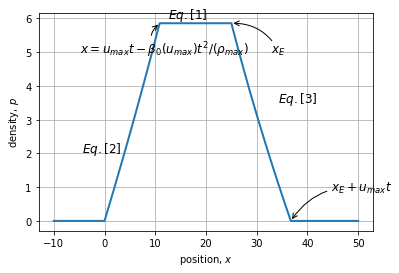

In [27]:
t = ts/2
x1 = umax * t - b0 * (umax / pmax) * t * t

# Density curve
p = np.zeros(len(x))
for i in range(len(x)):
    if (x[i] < x1 and x[i] > 0):
        p[i] = (pmax*umax - np.sqrt(pmax*umax*(-4*b0*x[i] + pmax*umax)))/(2*umax)
    if (x[i] > x1 and x[i] < x_E):
        p[i] = b0 * t
    if (x[i] >= x_E and x[i] < x_E + umax * t):
        p[i] = (umax*(2*b0*t + pmax) - np.sqrt(umax*(4*b0**2*t**2*umax - 4*b0*pmax*t*umax + 8*b0*pmax*x[i] - 8*b0*pmax*x_E + pmax**2*umax)))/(4*umax)

# Plot
plt.plot(x, p, linewidth=2.0)
plt.xlabel('position, $x$')
plt.ylabel('density, $p$')
plt.annotate(r'$x = u_{max}t - \beta_0 (u_{max}) t^2/(\rho_{max})$',xy = (x1,b0 * t),xycoords = 'data',
             xytext=(-80,-30),textcoords = 'offset points',fontsize = 12,
             arrowprops = dict(arrowstyle='->',
                                connectionstyle="arc3,rad=-.8"))
plt.annotate(r'$x_E$',xy = (x_E,b0 * t),xycoords = 'data',
             xytext=(+40,-30),textcoords = 'offset points',fontsize = 12,
             arrowprops = dict(arrowstyle='->',
                                connectionstyle="arc3,rad=.3"))
plt.annotate(r'$x_E + u_{max}t$',xy = (x_E + umax * t,0),xycoords = 'data',
             xytext=(+40,+30),textcoords = 'offset points',fontsize = 12,
             arrowprops = dict(arrowstyle='->',
                                connectionstyle="arc3,rad=.3"))

plt.annotate(r'$Eq.[2]$',xy = (x1/2, b0 * t/2),xycoords = 'data',
             xytext=(-50,-30),textcoords = 'offset points',fontsize = 12)

plt.annotate(r'$Eq.[1]$',xy = (x_E/2, b0 * t),xycoords = 'data',
             xytext=(0,+5),textcoords = 'offset points',fontsize = 12)

plt.annotate(r'$Eq.[3]$',xy = (x_E*2, b0 * t / 2),xycoords = 'data',
             xytext=(-80,+20),textcoords = 'offset points',fontsize = 12)
plt.grid(True)
plt.show()

#### 2) $t = t_E $ 

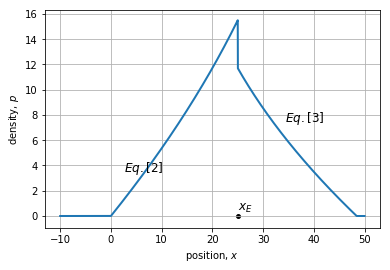

In [28]:
t = ts

# Density curve
p = np.zeros(len(x))
for i in range(len(x)):
    if (x[i] < x_E and x[i] > 0):
        p[i] = (pmax*umax - np.sqrt(pmax*umax*(-4*b0*x[i] + pmax*umax)))/(2*umax)
#         p[i] = (pmax*umax + sqrt(pmax*umax*(-4*b0*x[i] + pmax*umax)))/(2*umax)
    if (x[i] > x_E and x[i] < x_E + umax * t):
        p[i] = (umax*(2*b0*t + pmax) - np.sqrt(umax*(4*b0**2*t**2*umax - 4*b0*pmax*t*umax + 8*b0*pmax*x[i] - 8*b0*pmax*x_E + pmax**2*umax)))/(4*umax)

# Plot
plt.plot(x, p, linewidth=2.0)
plt.xlabel('position, $x$')
plt.ylabel('density, $p$')
plt.scatter([x_E],[0],s = 15,color='black')
plt.annotate(r'$x_E$',xy = (x_E,0),xycoords = 'data',
             xytext=(+0,+5),textcoords = 'offset points',fontsize = 12)
plt.annotate(r'$Eq.[2]$',xy = (x_E/2, b0 * t/2),xycoords = 'data',
             xytext=(-50,-30),textcoords = 'offset points',fontsize = 12)
plt.annotate(r'$Eq.[3]$',xy = (x_E*2, b0 * t / 2),xycoords = 'data',
             xytext=(-80,+20),textcoords = 'offset points',fontsize = 12)
plt.grid(True)
plt.show()    

#### 3) $ t > t_E$ 

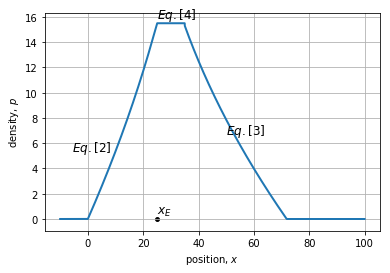

In [29]:
x = np.arange(-10, 100, 0.01)
t = ts*2

# Density curve
p = np.zeros(len(x))
for i in range(len(x)):
    if (x[i] < x_E and x[i] > 0):
        p[i] = (pmax*umax - np.sqrt(pmax*umax*(-4*b0*x[i] + pmax*umax)))/(2*umax)
#         p[i] = (pmax*umax + sqrt(pmax*umax*(-4*b0*x[i] + pmax*umax)))/(2*umax)
    if (x[i] > x_E and x[i] < x_E + 10):
        tp = (pmax / 2) * (1 - np.sqrt(1 - 4*b0*x_E / (pmax * umax)))
        p[i] = tp
    if (x[i] >= x_E+ 10 and x[i] < x_E + umax * t):
        p[i] = (umax*(2*b0*t + pmax) - np.sqrt(umax*(4*b0**2*t**2*umax - 4*b0*pmax*t*umax + 8*b0*pmax*x[i] - 8*b0*pmax*x_E + pmax**2*umax)))/(4*umax)

# Plot
plt.plot(x, p, linewidth=2.0)
plt.xlabel('position, $x$')
plt.ylabel('density, $p$')
plt.scatter([x_E],[0],s = 15,color='black')
plt.annotate(r'$x_E$',xy = (x_E,0),xycoords = 'data',
             xytext=(+0,+5),textcoords = 'offset points',fontsize = 12)
plt.annotate(r'$Eq.[2]$',xy = (x_E/2, tp/2),xycoords = 'data',
             xytext=(-50,-30),textcoords = 'offset points',fontsize = 12)

plt.annotate(r'$Eq.[4]$',xy = (x_E, tp ),xycoords = 'data',
             xytext=(0,+5),textcoords = 'offset points',fontsize = 12)

plt.annotate(r'$Eq.[3]$',xy = (x_E*2, tp / 3),xycoords = 'data',
             xytext=(0,+20),textcoords = 'offset points',fontsize = 12)
plt.grid(True)
plt.show() 

# 6. Conclusion





As we realized that Atlanta is the United States 4th most traffic-congested city, we were motivated by the goal in which we might want to study and simulate traffic flow in Atlanta. In order for us to reduce the gap between simulation and reality, we first tried to gather Atlanta real traffic data. We ended up getting the data from Georgia Department Of Transportation. 
<br>
Using the dataset, we first established a basic model based on linear Partial Differential Equation(PDE). Based on the linear model, we developed simulatation function for the selected road section on North I-85. We could inqure about the traffic condition by selecting specific date and time slot according to our needs. The validations showed that the linear model works well under selected road section of North I-85 of Atlanta.
<br>
As the second step, we established non-linear PDE to describe traffic flow and solve the the non-linear PDE using Runge-Kutta 4th order with discretization method. The results were validated with the real data to account for the accuracy of model. As a result, it was observed that both linear and non-linear model fit well with the real data; however, it was also found that the non-linear model is more accurate than linear model, which is what we expected at the beginning of this project. 
<br>
After solving these two models, we considered complex real traffic conditions including traffic light and entrance. We ended up extending the basic model to non-homogeneous model and showed the density change curves under such effects. We used the parameters achieved from the real data, and the density curve shows the same tendency as the figures at the reference book[1,3], which indicates the model works well.


# 7. Reference
[1] Haberman, Richard. *Mathematical models: mechanical vibrations, population dynamics, and traffic flow.* Vol. 21. Siam, 1998.
<br>
[2] Ascher, Uri M., Steven J. Ruuth, and Raymond J. Spiteri. "Implicit-explicit Runge-Kutta methods for time-dependent partial differential equations." Applied Numerical Mathematics 25.2-3 (1997): 151-167.
<br>
[3] Qiyuan Jiang, Jinxing Xie, Jun Ye. Mathematical Model, 1987: 389-397.


# Supplement:

Our labor division is as following:
*   Yuanlai Zhou: Formulate and implement the linear model; Verify the linear model accuracy by the case study for Atlanta real traffice data; write the notebook
*   Junghyun Kim: Formulate and implement the non-linear PDE model with RK4; Verify the non-linear model accuracy by the case study for Atlanta real traffice data; write the notebook
*   Wendi Ren: Formulate and implement the non-homogeneous models which shows the effect of traffic light and road entrance and exit; write the notebook